# Loteca

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Ler arquivo

In [2]:
df = np.load('arquivo.npy')

In [3]:
df

array([['Concurso 1 (18/02/2002)', '1', '2', ..., '4', 'Domingo ', ''],
       ['Concurso 1 (18/02/2002)', '2', '3', ..., '0', 'Domingo ', ''],
       ['Concurso 1 (18/02/2002)', '3', '2', ..., '1', 'Domingo ', ''],
       ...,
       ['Concurso 826 (12/11/2018)', '12', '0', ..., '0', 'Domingo ', ''],
       ['Concurso 826 (12/11/2018)', '13', '0', ..., '0', 'Domingo ', ''],
       ['Concurso 826 (12/11/2018)', '14', '0', ..., '0', 'Domingo ', '']],
      dtype='<U32')

In [4]:
for i in range(len(df)):
    df[i,8] = 'H' if (int(df[i,2]) - int(df[i,6])) > 0 else 'A' if (int(df[i,2]) - int(df[i,6])) < 0 else 'D'


In [5]:
df_ = pd.DataFrame(df,columns=['Concurso','Jogo','HG','Home','S','Away','AG','Dia','Res'])

In [6]:
df_.head()

,Concurso,Jogo,HG,Home,S,Away,AG,Dia,Res
0,Concurso 1 (18/02/2002),1,2,FLAMENGO/RJ,,S. PAULO/SP,4,Domingo,A
1,Concurso 1 (18/02/2002),2,3,VASCO/RJ,,AMERICANO/RJ,0,Domingo,H
2,Concurso 1 (18/02/2002),3,2,SANTOS/SP,,SÃO CAETANO/SP,1,Domingo,H
3,Concurso 1 (18/02/2002),4,1,P. DESPORTOS/SP,,CORINTHIANS/SP,4,Domingo,A
4,Concurso 1 (18/02/2002),5,7,CRUZEIRO/MG,,AMÉRICA/MG,0,Sábado,H


### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

<BarContainer object of 3 artists>

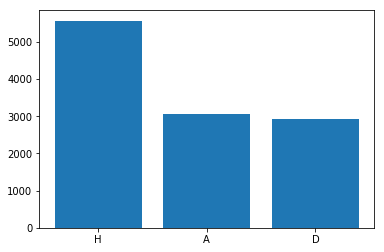

In [7]:
plt.bar(df_['Res'].value_counts().keys(),df_['Res'].value_counts())

### Nomes dos times

In [45]:
vocab = np.unique(np.concatenate((np.array(df_['Home'].unique()), np.array(df_['Away'].unique()))))

### Transformar em índices

In [47]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [49]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [50]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    
    return([word2idx.get(H),word2idx.get(A)])
    
#     vec = [word2vector(H), word2vector(A)]
#     return np.array(vec).reshape(np.array(vec).shape[1]*2)



### Função para indexar os jogos

In [51]:
def text_to_vector2(text): 
    return word2idx.get(text, None)


### Indexar os resultados

In [149]:
X = []
y = []

for _, row in df_.iterrows():
    X.append(prepare(row['Home'], row['Away']))    
    
    n = -int(row['HG']) + int(row['AG'])
    
    if np.isnan(n):
        n = 0
    
    y.append(-1 if n < 0 else 1 if n > 0 else 0)
    

In [53]:
np.array(X).shape

(11560, 2)

### Separar os datasets de treinamento e teste

### Suport vector machine

In [179]:
from sklearn.svm import SVR
model = SVR(gamma='scale', C=5.0, epsilon=0.2)
# model = SVC(gamma='scale', C=5.0)

### Random forest

In [173]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

### Treinar o modelo

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

l = len(X)

ini = int(-l/5)
fin = int(-l/20)

print(ini)
print(fin)

# X_train, X_test, y_train, y_test = X[:int(-len(X)/10)], X[int(len(X)-len(X)/10):],y[:int(-len(y)/10)], y[int(len(X)-len(y)/10):]

# X_train, X_test, y_train, y_test = X[ini:fin], X[fin:],y[ini:fin], y[fin:]




-2312
-578


In [201]:
model.fit(X_train, y_train)

SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Avaliar precisão

In [203]:
dfx = df_[int(-df_.shape[0]/20):]
prec = []
for idx, dfr in dfx.iterrows():
    p = model.predict([prepare(dfr['Home'],dfr['Away'])])
    
    px = 'H' if p[0] < 0 else 'A' if p[0] > 0 else 'D'
    
    prec.append(1 if px == dfr['Res'] else 0)
    
    dfx.loc[idx]['S'] = 'G' if px == dfr['Res'] else 'P'

print(round((abs(np.mean(prec))) * 100,0), '%')
    

53.0 %


In [204]:
dfx[dfx['S']=='G'].groupby(['Concurso'])['S'].value_counts()

Concurso                   S
Concurso 785 (05/02/2018)  G     1
Concurso 786 (14/02/2018)  G     9
Concurso 787 (20/02/2018)  G     6
Concurso 788 (26/02/2018)  G     7
Concurso 789 (05/03/2018)  G     8
Concurso 790 (12/03/2018)  G     4
Concurso 791 (19/03/2018)  G    10
Concurso 792 (26/03/2018)  G    10
Concurso 793 (02/04/2018)  G     7
Concurso 794 (09/04/2018)  G     7
Concurso 795 (16/04/2018)  G    11
Concurso 796 (23/04/2018)  G     7
Concurso 797 (30/04/2018)  G     4
Concurso 798 (07/05/2018)  G     7
Concurso 799 (14/05/2018)  G     7
Concurso 800 (21/05/2018)  G     8
Concurso 801 (28/05/2018)  G     6
Concurso 802 (04/06/2018)  G     8
Concurso 803 (11/06/2018)  G     5
Concurso 804 (18/06/2018)  G    10
Concurso 805 (25/06/2018)  G    12
Concurso 806 (28/06/2018)  G     5
Concurso 807 (02/07/2018)  G     7
Concurso 808 (09/07/2018)  G     9
Concurso 809 (16/07/2018)  G     6
Concurso 810 (23/07/2018)  G    10
Concurso 811 (30/07/2018)  G     9
Concurso 812 (06/08/2018) 

<BarContainer object of 2 artists>

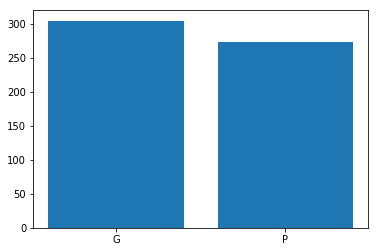

In [205]:
plt.bar(dfx['S'].value_counts().keys(),dfx['S'].value_counts())

### Loop para atingir maxima precisão

In [ ]:
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    
    model.fit(X_train, y_train)
    
    res = []
    for j in range(len(X_test)):
        r = model.predict([X_test[j]])
        res.append(round(r[0],0) - y_test[j])
    p = round((1 - abs(np.mean(res))) * 100,0)
    
    
    if p >= 100:
        break
        
print(round((1 - abs(np.mean(res))) * 100,0), '%')

### Salvar o modelo

In [59]:
from sklearn.externals import joblib

In [60]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [ ]:
model = joblib.load('model.joblib') 

### Lista de times

In [ ]:
from flask import jsonify

In [ ]:
d = {}

In [ ]:
d['teams'] = vocab.tolist()

In [ ]:
import json


In [ ]:
json.dumps(d)

In [ ]:
vocab

### Realizar previsão

In [153]:
H = 'ATLÉTICO/MG'
A = 'SANTOS/SP'

p = model.predict([prepare(H,A)])

if p < 0:
    print(H, 'Vence com ', round(abs(p[0]),3),' gol de diferença')
else:
    print(A, 'Vence com', round(abs(p[0]),3),' gol de diferença')

ATLÉTICO/MG Vence com  1  gol de diferença


In [ ]:
r = {}

r["H"]=H
r["A"]=A
r["p"]=p[0]

In [154]:
p

array([-1])